# Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [2]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('Course_info.csv')
rawcoursedata.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


# Clean Data
### 1. Standardise the Variable Names

In [5]:
# Create a copy of the Dataset
coursedata_clean = rawcoursedata.copy()

# Remove non-usable columns
coursedata_clean.drop(['course_url', 'instructor_url','id'],axis=1,inplace=True)

# Convert all Variable Names to UPPERCASE
coursedata_clean.columns = coursedata_clean.columns.str.upper()

# Print the Variable Information to check
coursedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TITLE               209734 non-null  object 
 1   IS_PAID             209734 non-null  bool   
 2   PRICE               209734 non-null  float64
 3   HEADLINE            209707 non-null  object 
 4   NUM_SUBSCRIBERS     209734 non-null  float64
 5   AVG_RATING          209734 non-null  float64
 6   NUM_REVIEWS         209734 non-null  float64
 7   NUM_COMMENTS        209734 non-null  float64
 8   NUM_LECTURES        209734 non-null  float64
 9   CONTENT_LENGTH_MIN  209734 non-null  float64
 10  PUBLISHED_TIME      209734 non-null  object 
 11  LAST_UPDATE_DATE    209597 non-null  object 
 12  CATEGORY            209734 non-null  object 
 13  SUBCATEGORY         209734 non-null  object 
 14  TOPIC               208776 non-null  object 
 15  LANGUAGE            209734 non-nul

### 2.Remove null values

In [6]:
coursedata_clean.isnull().sum()

TITLE                   0
IS_PAID                 0
PRICE                   0
HEADLINE               27
NUM_SUBSCRIBERS         0
AVG_RATING              0
NUM_REVIEWS             0
NUM_COMMENTS            0
NUM_LECTURES            0
CONTENT_LENGTH_MIN      0
PUBLISHED_TIME          0
LAST_UPDATE_DATE      137
CATEGORY                0
SUBCATEGORY             0
TOPIC                 958
LANGUAGE                0
INSTRUCTOR_NAME         5
dtype: int64

In [13]:
#replace null topic with Unknown
coursedata_clean.TOPIC.fillna('Unknown', inplace = True)

#replace null headline with Unknown
coursedata_clean.HEADLINE.fillna('Unknown', inplace = True)

#replace null instructorname with Unknown
coursedata_clean.INSTRUCTOR_NAME.fillna('Unknown', inplace = True)

#exclude time from PUBLISHED_TIME 
coursedata_clean['PUBLISHED_TIME'] = pd.to_datetime(coursedata_clean['PUBLISHED_TIME']).dt.date


In [14]:
coursedata_clean.isnull().sum()

TITLE                   0
IS_PAID                 0
PRICE                   0
HEADLINE                0
NUM_SUBSCRIBERS         0
AVG_RATING              0
NUM_REVIEWS             0
NUM_COMMENTS            0
NUM_LECTURES            0
CONTENT_LENGTH_MIN      0
PUBLISHED_TIME          0
LAST_UPDATE_DATE      137
CATEGORY                0
SUBCATEGORY             0
TOPIC                   0
LANGUAGE                0
INSTRUCTOR_NAME         0
dtype: int64

In [15]:
coursedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TITLE               209734 non-null  object 
 1   IS_PAID             209734 non-null  bool   
 2   PRICE               209734 non-null  float64
 3   HEADLINE            209734 non-null  object 
 4   NUM_SUBSCRIBERS     209734 non-null  float64
 5   AVG_RATING          209734 non-null  float64
 6   NUM_REVIEWS         209734 non-null  float64
 7   NUM_COMMENTS        209734 non-null  float64
 8   NUM_LECTURES        209734 non-null  float64
 9   CONTENT_LENGTH_MIN  209734 non-null  float64
 10  PUBLISHED_TIME      209734 non-null  object 
 11  LAST_UPDATE_DATE    209597 non-null  object 
 12  CATEGORY            209734 non-null  object 
 13  SUBCATEGORY         209734 non-null  object 
 14  TOPIC               209734 non-null  object 
 15  LANGUAGE            209734 non-nul

### 3.Remove outliers for numeric datas

In [36]:
# Extract the float64 variables for simplicity
numeric = coursedata_clean[['PRICE','NUM_SUBSCRIBERS', 'AVG_RATING', 'NUM_REVIEWS', 'NUM_COMMENTS','NUM_LECTURES', 'CONTENT_LENGTH_MIN']].copy()

PRICE                 11404
NUM_SUBSCRIBERS       31288
AVG_RATING            29601
NUM_REVIEWS           30255
NUM_COMMENTS          28918
NUM_LECTURES          16890
CONTENT_LENGTH_MIN    19173
dtype: int64

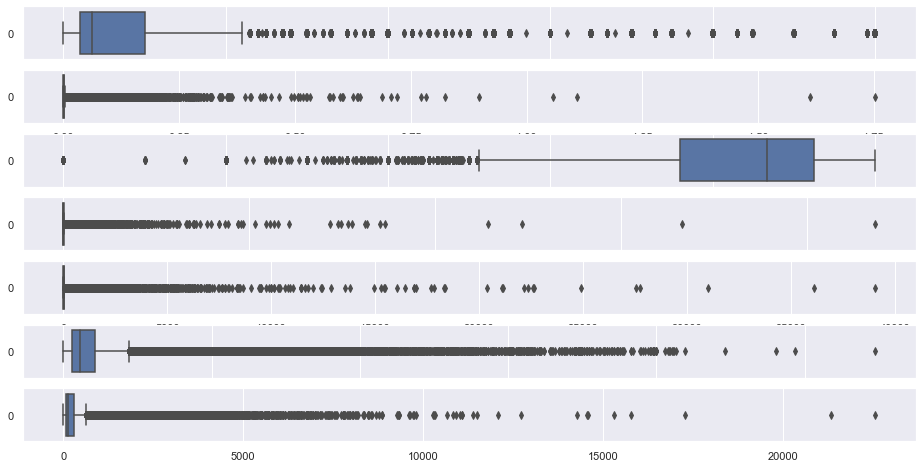

In [37]:
# Draw the boxplots
f, axes = plt.subplots(7, 1, figsize=(16, 8))

sb.boxplot(data = float_column["PRICE"], orient = "h", ax = axes[0])
sb.boxplot(data = float_column["NUM_SUBSCRIBERS"], orient = "h", ax = axes[1])
sb.boxplot(data = float_column["AVG_RATING"], orient = "h", ax = axes[2])
sb.boxplot(data = float_column["NUM_REVIEWS"], orient = "h", ax = axes[3])
sb.boxplot(data = float_column["NUM_COMMENTS"], orient = "h", ax = axes[4])
sb.boxplot(data = float_column["NUM_LECTURES"], orient = "h", ax = axes[5])
sb.boxplot(data = float_column["CONTENT_LENGTH_MIN"], orient = "h", ax = axes[6])

# Calculate the quartiles
Q1 = float_column.quantile(0.25)
Q3 = float_column.quantile(0.75)

# Rule to identify outliers
rule = ((float_column < (Q1 - 1.5 * (Q3 - Q1))) | (float_column > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [40]:
# Calculate the quartiles
Q1 = float_column.quantile(0.25)
Q3 = float_column.quantile(0.75)

# Rule to identify outliers
rule = ((float_column < (Q1 - 1.5 * (Q3 - Q1))) | (float_column > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,PRICE,NUM_SUBSCRIBERS,AVG_RATING,NUM_REVIEWS,NUM_COMMENTS,NUM_LECTURES,CONTENT_LENGTH_MIN
0,False,False,False,False,False,False,True
1,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False
3,False,True,False,True,True,False,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
209729,False,False,True,False,False,False,False
209730,False,False,True,False,False,False,False
209731,False,False,True,False,False,False,False
209732,False,False,True,False,False,False,False


In [41]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers
outliers

0          True
1          True
2         False
3          True
4         False
          ...  
209729     True
209730     True
209731     True
209732     True
209733     True
Length: 209734, dtype: bool

In [42]:
# Total number of outliers for the two variables
outliers.value_counts()

False    114994
True      94740
dtype: int64

In [43]:
# Find the row indices correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([     0,      1,      3,      5,      6,      7,      8,      9,
                11,     13,
            ...
            209722, 209724, 209726, 209727, 209728, 209729, 209730, 209731,
            209732, 209733],
           dtype='int64', length=94740)

In [44]:
# Remove the outliers based on the row indices obtained above
float_column.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
float_column

,PRICE,NUM_SUBSCRIBERS,AVG_RATING,NUM_REVIEWS,NUM_COMMENTS,NUM_LECTURES,CONTENT_LENGTH_MIN
2,19.99,1713.0,4.400000,41.0,13.0,14.0,82.0
4,159.99,1266.0,4.750000,38.0,12.0,38.0,569.0
10,49.99,794.0,4.100000,27.0,16.0,10.0,236.0
12,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0
16,29.99,505.0,3.250000,24.0,3.0,19.0,148.0
...,...,...,...,...,...,...,...
209706,24.99,14.0,5.000000,5.0,6.0,11.0,68.0
209711,34.99,206.0,4.650000,10.0,1.0,56.0,275.0
209719,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0
209723,19.99,321.0,5.000000,8.0,7.0,10.0,44.0
